In [6]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves

Populating the interactive namespace from numpy and matplotlib


In [2]:
# archivo = input('archivo de sonido:' )
archivo = 'Amigo.wav'
muestreo, sonido = waves.read(archivo)

In [3]:
# canales: monofónico o estéreo
tamano = np.shape(sonido)
muestras = tamano[0]
m = len(tamano)
canales = 1  # monofónico
if (m>1):  # estéreo
    canales = tamano[1]
# experimento con un canal
if (canales>1):
    canal = 0
    uncanal = sonido[:,canal] 
else:
    uncanal = sonido
# rango de observación en segundos
inicia = 0.000
termina = 2*60+54
# observación en número de muestra
a = int(inicia*muestreo)
b = int(termina*muestreo)
parte = uncanal[a:b]

Text(0,0.5,'|Y(f)|')

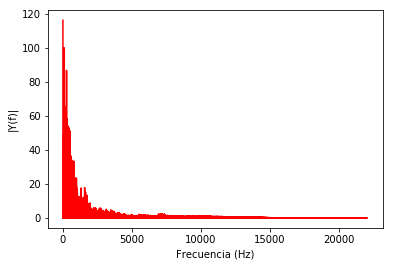

In [18]:
y=sonido[:,0]
n = len(y) # longitud de la señal

k = arange(n)
Fs= muestreo
T = n/Fs

frq = k/T # 2 lados del rango de frecuancia
for i in range(0,n):
    if i>n/2:
        frq[i]=0
#frq = frq[arange(n/2)] # Un lado del rango de frecuencia
Y = fft.fft(y)/n # fft calcula la normalizacion
for i in range(0,n):
    if i>n/2:
       Y[i]=0
    
#Y = Y[arange(n/2)]
plot(frq[0:n/2],abs(Y[0:n/2]),'r') # grafica el espectro de frecuencia

xlabel('Frecuencia (Hz)')

ylabel('|Y(f)|')

In [23]:
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [33]:
b, a = butter_bandpass(510, 6210, Fs, order=3)
z = lfilter(b, a, sonido[:,0])

In [35]:
# Salida # Archivo de audio.wav
print('archivo de parte[] grabado...')
waves.write('parte01.wav', muestreo, z)

archivo de parte[] grabado...


NameError: name 't' is not defined